## PyTorch Tutorials

step by step clone coding from
https://pytorch.org/tutorials/beginner/blitz

### Tensors

In [1]:
import torch
import numpy as np

In [2]:
# tensor initialization

# directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
# from numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
# from another tensor
x_ones = torch.ones_like(x_data) # same properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3157, 0.7685],
        [0.8587, 0.6048]]) 



In [6]:
# random or constant valu
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6992, 0.9611, 0.3386],
        [0.4037, 0.3233, 0.4490]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
# tensor attributes

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

### Tensor operations

In [9]:
# numpy like indexing 
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# joining tensors
t1  = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [12]:
# multiplying tensors
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
# matrix multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [14]:
# In-place operations Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [15]:
"""
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change    the other.
"""

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [16]:
# change in tensor reflects in the numpy array
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [18]:
# numpy to tensor
n = np.ones(5)
t = torch.from_numpy(n)

In [19]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### Intro to Autograd

In [20]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [22]:
# forward pass
prediction = model(data) 

In [23]:
loss = (prediction - labels).sum() # loss compute

In [24]:
loss.backward() # backward pass

In [25]:
# load optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [26]:
# initiate gradient descent
optim.step()

#### Differentiation in Autograd

In [27]:
import torch

# requires_grad=True, signals autograd to track every operation
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [28]:
# another tensor Q
Q = 3*a**3 - b**2

In [29]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [31]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [32]:
# Freezing parameters

from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(512, 10)

# Optimize only the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

### Neural Networks

In [41]:
# define the network

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 * 6 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    # max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # if suaure only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:] # all dimentions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features
  
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [42]:
# parameters returned by net.parameters()
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [43]:
params

[Parameter containing:
 tensor([[[[-0.0596,  0.2672, -0.1939],
           [-0.2410, -0.2225, -0.0747],
           [ 0.2557, -0.0398,  0.2422]]],
 
 
         [[[ 0.0283,  0.1572, -0.1483],
           [ 0.0587,  0.1319,  0.1934],
           [ 0.1457, -0.1846, -0.1553]]],
 
 
         [[[-0.0997, -0.1676,  0.1799],
           [ 0.2298,  0.1370,  0.1261],
           [-0.2380,  0.1007, -0.1426]]],
 
 
         [[[-0.1444, -0.0859,  0.2797],
           [ 0.2476,  0.3246, -0.0061],
           [-0.2183,  0.0755, -0.2162]]],
 
 
         [[[-0.1831, -0.0065, -0.1954],
           [ 0.1408, -0.0266, -0.1757],
           [ 0.3271,  0.2547,  0.2510]]],
 
 
         [[[ 0.0216, -0.0934, -0.2386],
           [ 0.1572,  0.0523, -0.1364],
           [ 0.1322,  0.1317, -0.1632]]]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2818,  0.3265, -0.0273, -0.0819, -0.1981,  0.1342],
        requires_grad=True),
 Parameter containing:
 tensor([[[[ 7.3627e-03,  1.2525e-01,  6.6987e-02],
           [

In [44]:
# try random input
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0740, -0.1286,  0.0135,  0.1138, -0.0428,  0.0585, -0.1465,  0.0498,
          0.0281,  0.0715]], grad_fn=<AddmmBackward>)


In [45]:
net.zero_grad()

In [46]:
out.backward(torch.rand(1,10))

### Loss Function

In [48]:
# loss function takes in output, target pair of inputs
output = net(input)
target = torch.randn(10) # dummy target, for example
target = target.view(1, -1) # reshape
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2067, grad_fn=<MseLossBackward>)


In [49]:
"""
following loss in the backward direction

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

"""

'\nfollowing loss in the backward direction\n\ninput -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d\n      -> view -> linear -> relu -> linear -> relu -> linear\n      -> MSELoss\n      -> loss\n\n'

In [50]:
# calling loss.backward() computes differentiated loss

print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

In [51]:
net.zero_grad()  # zeros the gradient buffers

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0004,  0.0296,  0.0011,  0.0302, -0.0224, -0.0130])


### Update weights using simple SGD rule

In [52]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

In [53]:
# or use the libraray
import torch.optim as optim

# your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# training loop
optimizer.zero_grad() # zero buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

### Training a classifier

In [54]:
# load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

In [55]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


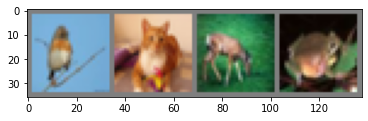

 bird   cat  deer  frog


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# function to print image 

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [57]:
# define convolutional neural network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [58]:
# define loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [60]:
# train the network

for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # pring every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
print("Finished")

[1,  2000] loss: 2.197
[1,  4000] loss: 1.877
[1,  6000] loss: 1.665
[1,  8000] loss: 1.556
[1, 10000] loss: 1.494
[1, 12000] loss: 1.441
[2,  2000] loss: 1.354
[2,  4000] loss: 1.339
[2,  6000] loss: 1.314
[2,  8000] loss: 1.286
[2, 10000] loss: 1.266
[2, 12000] loss: 1.261
Finished


In [61]:
# save model
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

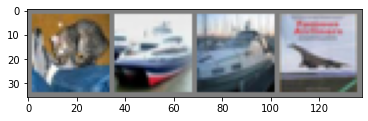

GroundTruth:    cat  ship  ship plane


In [62]:
# test the network

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [63]:
# load back the model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [64]:
outputs = net(images)

In [65]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


In [66]:
# predict the whole data set
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [67]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 77 %
Accuracy of  bird : 34 %
Accuracy of   cat : 62 %
Accuracy of  deer : 27 %
Accuracy of   dog : 37 %
Accuracy of  frog : 68 %
Accuracy of horse : 65 %
Accuracy of  ship : 77 %
Accuracy of truck : 54 %
